In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import copy
import json
import numpy as np
import math
polya = 'AATAAA'

In [6]:
latin = {}
with open('Metadata') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if not line.startswith('#'):
            dat = line.strip().split('\t')
            latin[dat[0]] = dat[1]

In [4]:
families2 = []
with open('./PhyloTree/leaves_order_one_per_family') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        families2.append(dat[1])
malseq = {}
seq_file = 'MALAT1_gene_all.fasta'
with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            malseq[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    malseq[name] = ''.join(l)
    
nseq = {}
seq_file = './NEAT1_gene_all.fasta'
with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            nseq[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    nseq[name] = ''.join(l)

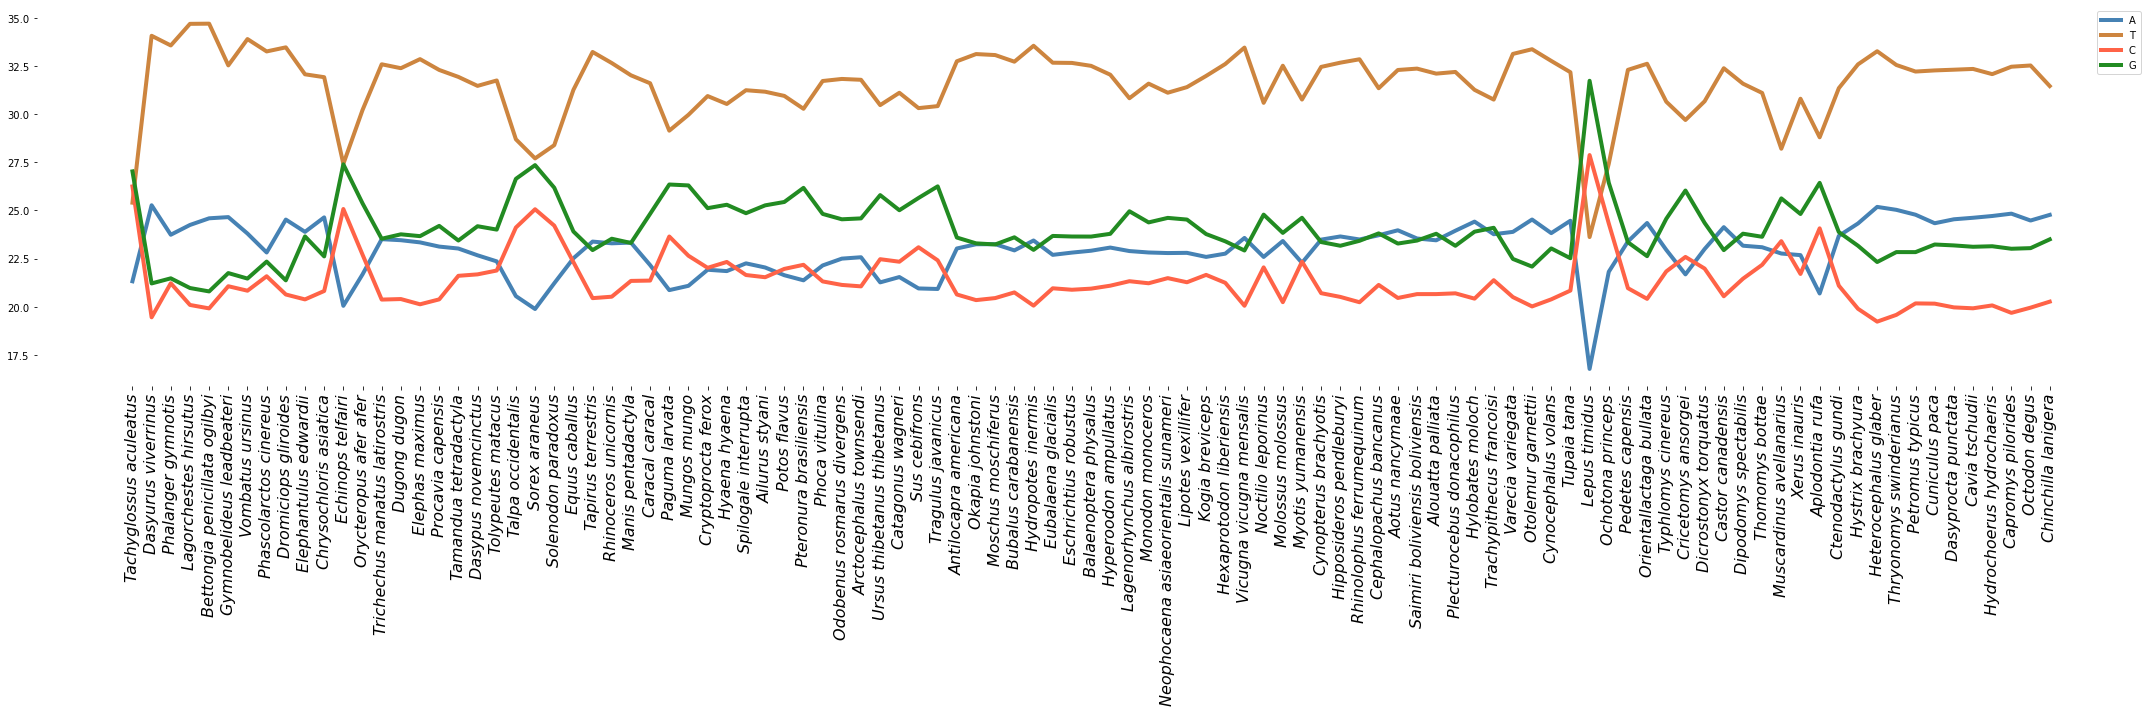

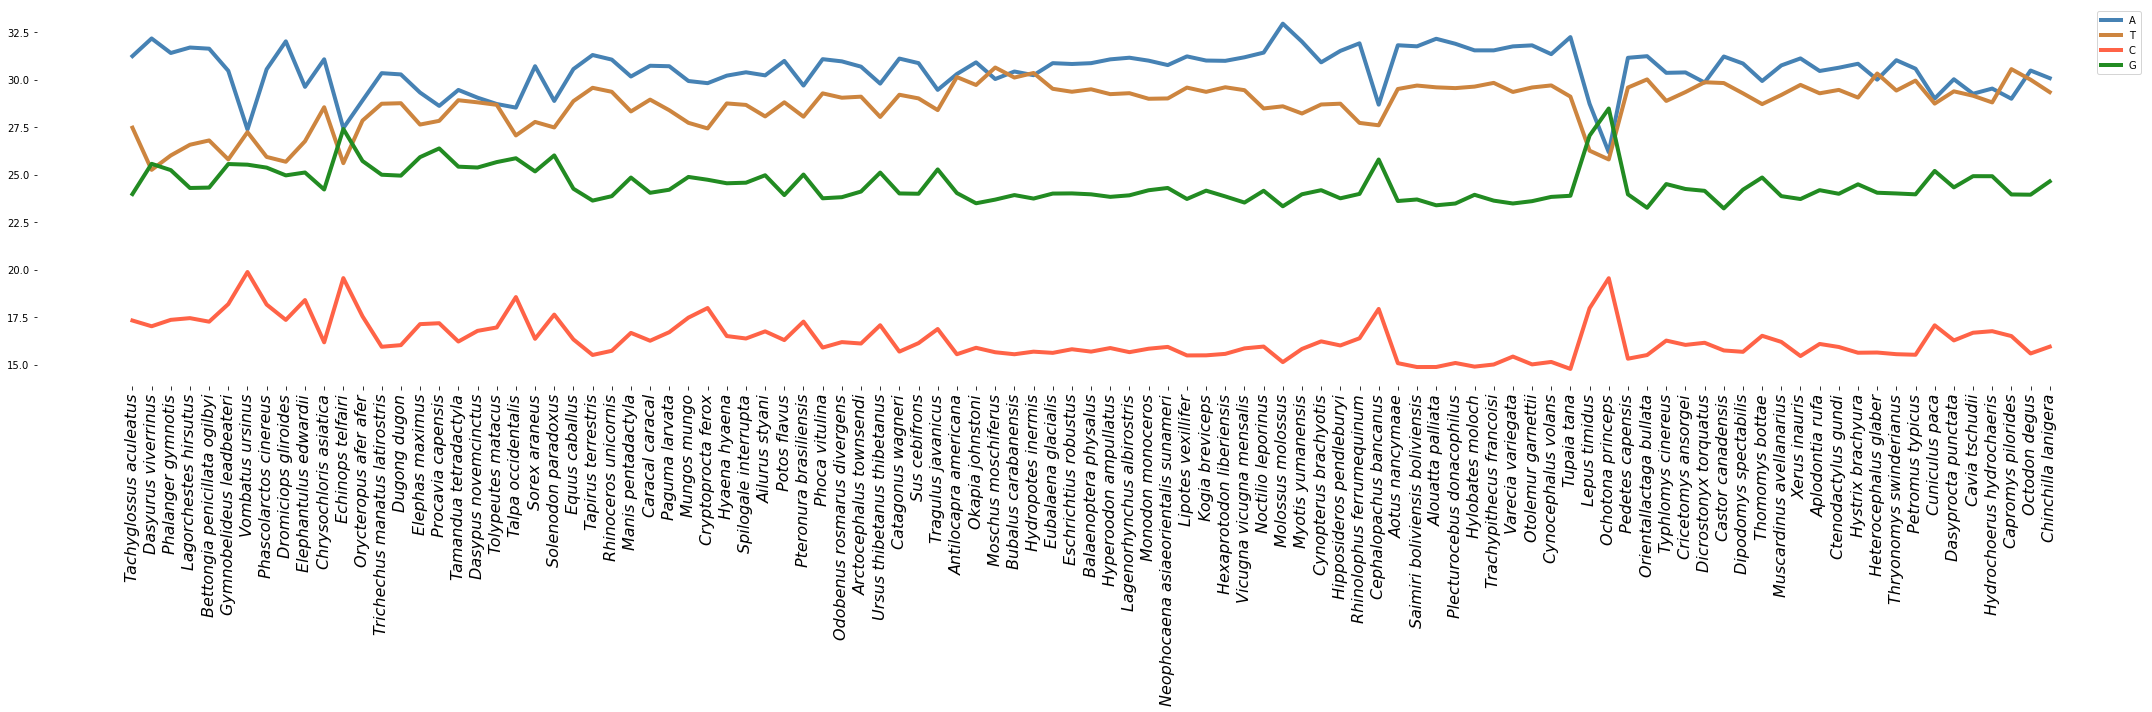

In [7]:
nucl = ['A','T','C','G']
colors = {'A':'steelblue','T':'peru','C':'tomato','G':'forestgreen'}
bins = {i:[] for i in nucl}
families = [i for i in families2[::-1] if i in nseq and i in malseq]
for gene in families:
    allen = len(nseq[gene])
    data = list(nseq[gene])
    for letter in nucl:
        bins[letter].append(data.count(letter)/allen*100)
plt.figure(figsize=(30,10))
for letter in nucl:
    plt.plot(bins[letter],label=letter,color=colors[letter],linewidth=4)
plt.legend()
plt.box(False)
plt.xticks([i for i in range(len(families))],[latin[i] for i in families],rotation=90,fontsize=16,fontstyle='italic')
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1_NuclUsageOneFamily.png',dpi=400)


bins = {i:[] for i in nucl}

for gene in families:
    allen = len(malseq[gene])
    data = list(malseq[gene])
    for letter in nucl:
        bins[letter].append(data.count(letter)/allen*100)
plt.figure(figsize=(30,10))
for letter in nucl:
    plt.plot(bins[letter],label=letter,color=colors[letter],linewidth=4)
plt.legend()
plt.box(False)
plt.xticks([i for i in range(len(families))],[latin[i] for i in families],rotation=90,fontsize=16,fontstyle='italic')
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1_NuclUsageOneFamily.png',dpi=400)



In [4]:
Archetypes = ['GCF_015852505.1_mTacAcu1.pri', 'GCF_016433145.1_AgileGrace', 'GCA_016432865.2_AdamAnt_v2',
         'GCF_000313985.2_ASM31398v2', 'GCA_000152225.2_Pcap_2.0', 'GCF_014898055.1_MPIMG_talOcc4',
         'GCF_000296755.1_EriEur2.0', 'GCA_029834395.2_SorCin_2.1', 'Human_NEAT1', 'GCA_013371645.1_OryCun3.0',
         'GCF_014633375.1_OchPri4.0', 'GCF_020740685.1_mJacJac1.mat.Y.cur', 'GCA_023101885.1_KIZ_TCIN_v1.0',
         'Mouse_NEAT1','GCF_019054845.1_ASM1905484v1', 'GCA_004027875.1_AplRuf_v1_BIUU']

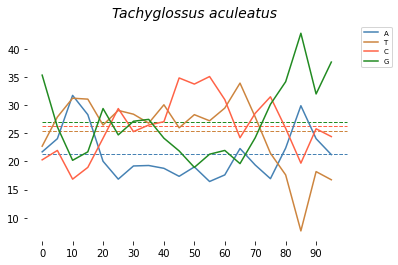

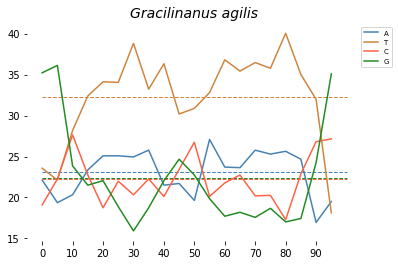

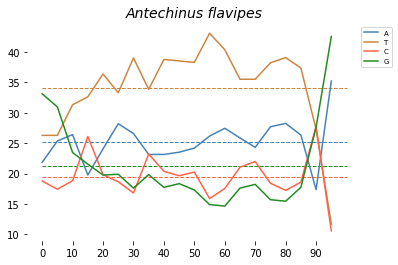

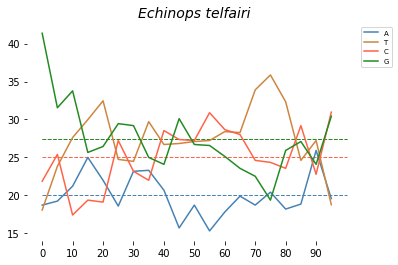

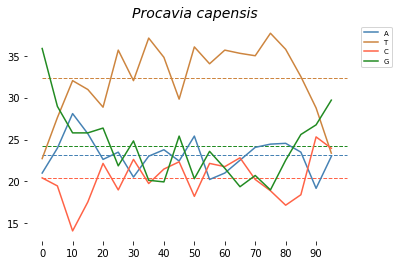

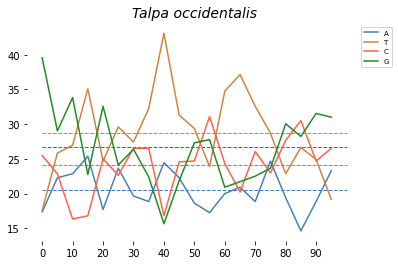

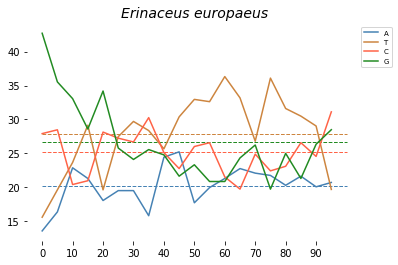

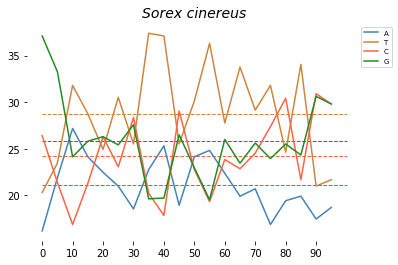

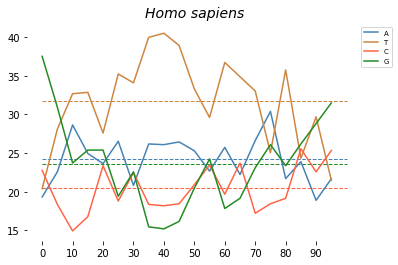

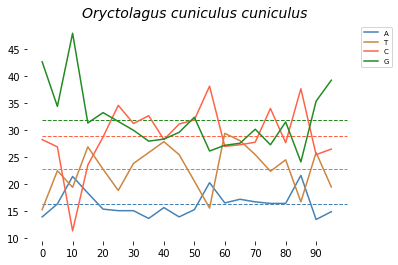

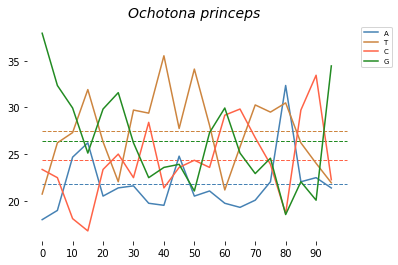

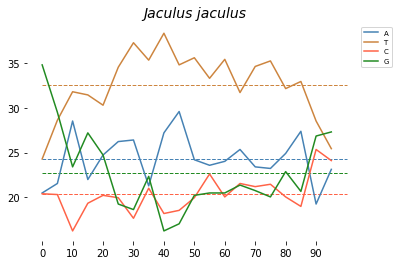

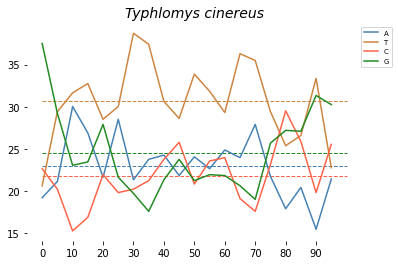

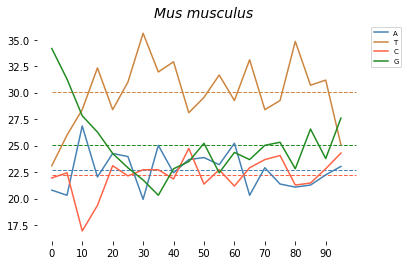

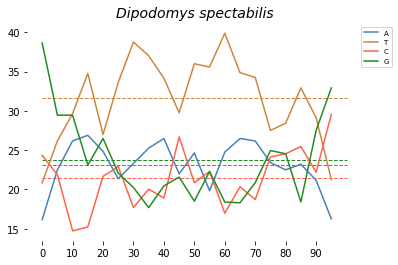

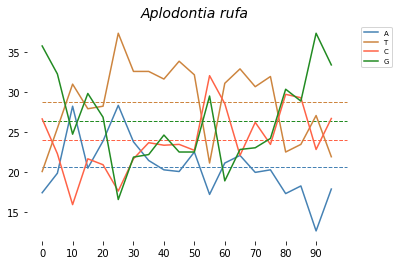

In [48]:
for gene in Archetypes:

    allen = len(nseq[gene])
    granularity = 20
    bins = {i:[] for i in nucl}
    r = math.ceil(allen / granularity) 
    data = list(nseq[gene])
    for i in range(granularity):
        sl = data[i*r:(i+1)*r]
        if sl:
            for letter in nucl:
                bins[letter].append(sl.count(letter)/len(sl)*100)

    plt.figure()

    for letter in nucl:
        plt.plot(bins[letter],label=letter,color=colors[letter])
        plt.hlines(data.count(letter)/allen*100,xmin=0,xmax=granularity,color=colors[letter],
                  linewidth=1,linestyle='--')
    plt.title(latin[gene], fontsize=14,fontstyle='italic')
    plt.xticks([i for i in range(0,20,2)],[i for i in range(0,100,10)])
    plt.yticks(fontsize=10)
    plt.legend(bbox_to_anchor=(1.1, 1),fontsize=7)
    plt.box(False)

    plt.savefig('./FiguresPublication/NEAT1_NuclUsageAlongGene_' + gene+ '.png',dpi=400)

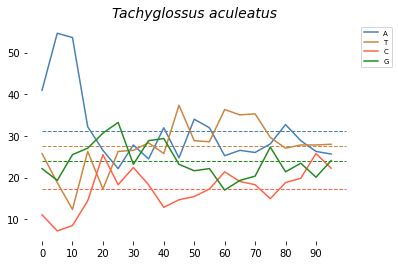

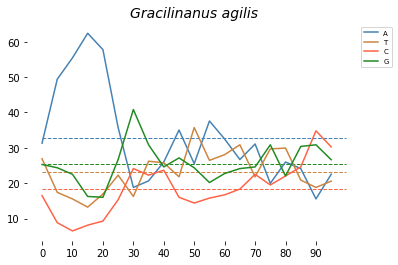

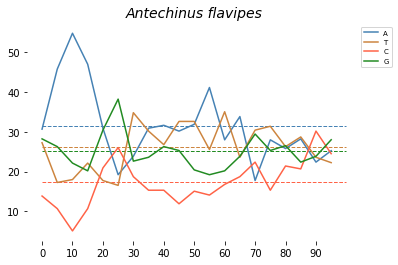

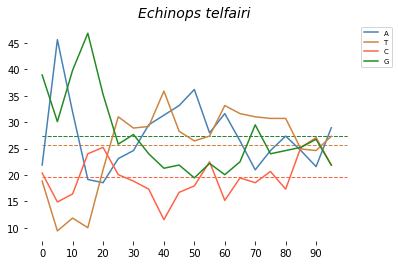

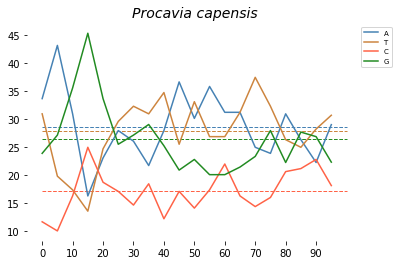

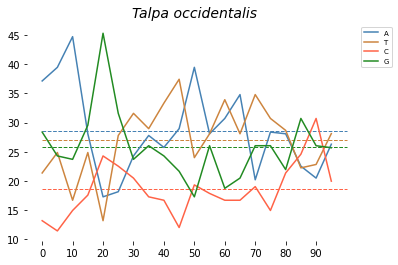

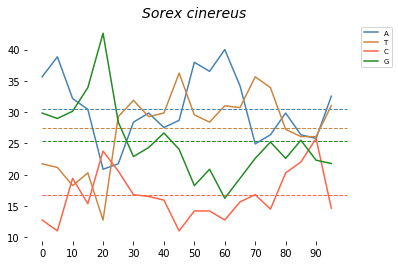

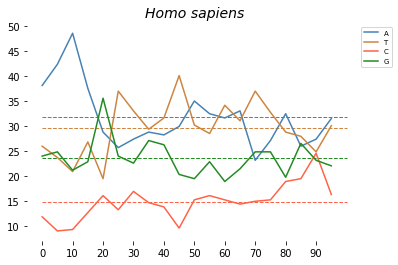

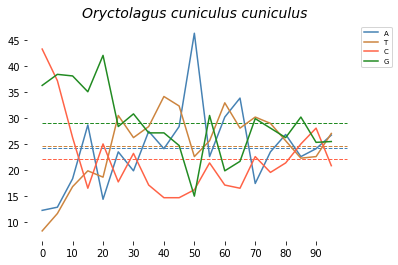

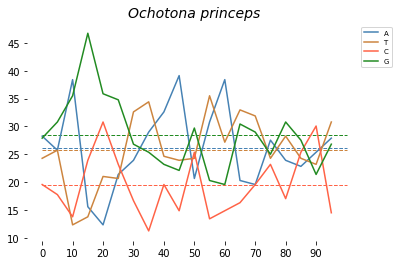

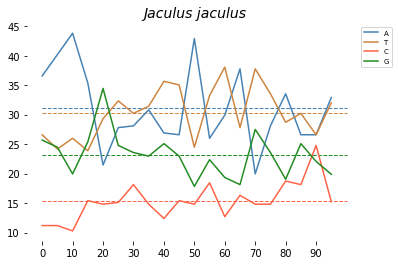

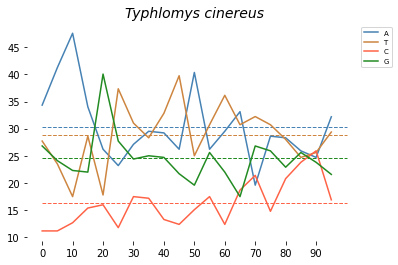

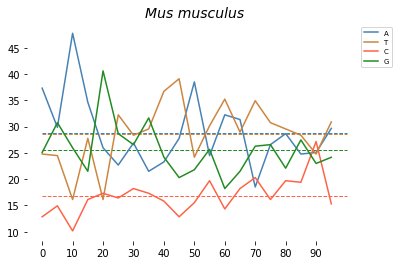

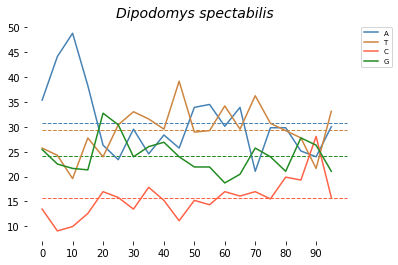

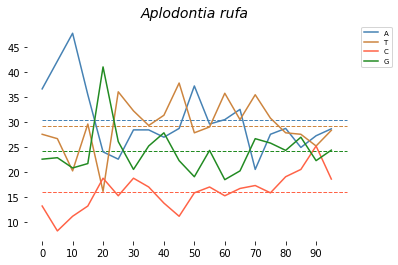

In [6]:
Archetypes = ['GCF_015852505.1_mTacAcu1.pri', 'GCF_016433145.1_AgileGrace', 'GCA_016432865.2_AdamAnt_v2',
         'GCF_000313985.2_ASM31398v2', 'GCA_000152225.2_Pcap_2.0', 'GCF_014898055.1_MPIMG_talOcc4',
         'GCF_000296755.1_EriEur2.0', 'GCA_029834395.2_SorCin_2.1', 'Human_MALAT1', 'GCA_013371645.1_OryCun3.0',
         'GCF_014633375.1_OchPri4.0', 'GCF_020740685.1_mJacJac1.mat.Y.cur', 'GCA_023101885.1_KIZ_TCIN_v1.0',
         'Mouse_MALAT1','GCF_019054845.1_ASM1905484v1', 'GCA_004027875.1_AplRuf_v1_BIUU']

nucl = ['A','T','C','G']
colors = {'A':'steelblue','T':'peru','C':'tomato','G':'forestgreen'}
for gene in Archetypes:
    if gene in malseq:
        allen = len(malseq[gene])
        granularity = 20
        bins = {i:[] for i in nucl}
        r = math.ceil(allen / granularity) 
        data = list(malseq[gene])
        for i in range(granularity):
            sl = data[i*r:(i+1)*r]
            if sl:
                for letter in nucl:
                    bins[letter].append(sl.count(letter)/len(sl)*100)

        plt.figure()

        for letter in nucl:
            plt.plot(bins[letter],label=letter,color=colors[letter])
            plt.hlines(data.count(letter)/allen*100,xmin=0,xmax=granularity,color=colors[letter],
                      linewidth=1,linestyle='--')
        plt.title(latin[gene], fontsize=14,fontstyle='italic')
        plt.xticks([i for i in range(0,20,2)],[i for i in range(0,100,10)])
        plt.yticks(fontsize=10)
        plt.legend(bbox_to_anchor=(1.1, 1),fontsize=7)
        plt.box(False)

        plt.savefig('./FiguresPublication/MALAT1_NuclUsageAlongGene_' + gene+ '.png',dpi=400)